# CENSUS DATA

In [1]:
import sklearn.neural_network._multilayer_perceptron as mlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder = "C:/Users/chad/OneDrive - Victoria University of Wellington - STUDENT/DATA581 - waka kotahi"
path = "/STATSNZ,CEN23_TBT_012,1.0+all.csv"

full = pd.read_csv(folder+path)

# around 30 seconds to read in 4.5GB csv file

C:\Users\chad\AppData\Local\Temp\ipykernel_112672\1723497742.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv(folder+path)


In [5]:
### remove this section if the next section works fine
# 
#  # take a sample of the full set to set the workflow for restructuring data
# working = full.sample(n=15000)

# # Shorten column names
# new_cols = working.columns.str.split(": ", expand = True)
# new_cols = [thing[1] if type(thing[1])==str else thing[0] for thing in new_cols ]

# working.rename(columns = dict(zip(working.columns, new_cols)), inplace=True)

# # split "Variable codes" by ": " into "code" and "variable"
# new_working = working["Variable codes"].str.split(": ", expand = True, )
# # split "code" into concept code and response indicator
# dim_levels = new_working[0].str.split("(?<=[a-z])((?=[0-9])|(?=[A-Z]))", expand = True)
# # check output
# dim_levels


,0,1,2,3,4
20568698,inw,,O,None,None
36081420,sp,,04,None,None
41623003,tww,,Total,None,None
30677504,pq,,TS,None,None
14206796,hq,,009,None,None
...,...,...,...,...,...
13430574,hq,,001,None,None
27738084,pi,,01,None,None
17266028,inu,,C,None,None
26736252,ocu,,4,None,None


In [62]:
# split "Variable codes" by ": " into "code" and "variable"
dim_levels = full.drop_duplicates(subset = full.columns[1]).copy()
# split Variables column into code and variable
dim_levels[["code", "variable"]] = dim_levels.loc[:, dim_levels.columns[1]].str.split(": ", expand = True)
dim_levels[["category", "remove1", "response", "remove2", "response2"]] = dim_levels["code"].str.split("(?<=[a-z])((?=[0-9])|(?=[A-Z]))", expand = True)

dim_levels

,DATAFLOW,CEN23_TBT_IND_003: Variable codes,CEN23_TBT_GEO_002: Area,CEN23_YEAR_001: Census year,OBS_VALUE,OBS_STATUS: Observation Status,code,variable,category,remove1,response,remove2,response2
0,STATSNZ:CEN23_TBT_012(1.0),1y01: Same as usual residence,7000000: 7000000,2018,102.0,NaN,1y01,Same as usual residence,1y,,01,None,None
66330,STATSNZ:CEN23_TBT_012(1.0),1y02: Elsewhere in New Zealand,7000000: 7000000,2018,12.0,NaN,1y02,Elsewhere in New Zealand,1y,,02,None,None
132660,STATSNZ:CEN23_TBT_012(1.0),1y03: Not born one year ago,7000000: 7000000,2018,0.0,NaN,1y03,Not born one year ago,1y,,03,None,None
198990,STATSNZ:CEN23_TBT_012(1.0),1y04: Overseas,7000000: 7000000,2018,0.0,NaN,1y04,Overseas,1y,,04,None,None
265320,STATSNZ:CEN23_TBT_012(1.0),1y05: No fixed abode one year ago,7000000: 7000000,2018,0.0,NaN,1y05,No fixed abode one year ago,1y,,05,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45137565,STATSNZ:CEN23_TBT_012(1.0),yu5: 30 years or more,7000000: 7000000,2013,15.0,NaN,yu5,30 years or more,yu,,5,None,None
45237060,STATSNZ:CEN23_TBT_012(1.0),yu9: Not elsewhere included,7000000: 7000000,2013,12.0,NaN,yu9,Not elsewhere included,yu,,9,None,None
45336555,STATSNZ:CEN23_TBT_012(1.0),yumea: Average - years at usual residence,7000000: 7000000,2013,13.2,NaN,yumea,Average - years at usual residence,yumea,None,None,None,None
45436050,STATSNZ:CEN23_TBT_012(1.0),yuTotal: Years at usual residence - total cens...,7000000: 7000000,2013,144.0,NaN,yuTotal,Years at usual residence - total census usuall...,yu,,Total,None,None


Census data can be initially split into 13 columns and these can be further reduced to remove columns without useful information:  

    - "DATAFLOW": refers to the source of the dataset and is consistent for each row, providing no insight across different SA1 areas
    - "CEN23_TBT_IND_003: Variable codes": column has been split into "category", "remove1", "response1", "remove2", "response2", and "variable" columns
    - "remove1" and "remove2":  contain null values

The "CEN23_TBT_GEO_002: Area" contains the start and end values for each SA1, since these are the same value for each row, this column can also be split to reduce length.

,DATAFLOW,CEN23_TBT_IND_003: Variable codes,CEN23_TBT_GEO_002: Area,CEN23_YEAR_001: Census year,OBS_VALUE,OBS_STATUS: Observation Status,code,variable,category,remove1,response,remove2,response2
0,STATSNZ:CEN23_TBT_012(1.0),1y01: Same as usual residence,7000000: 7000000,2018,102.0,NaN,1y01,Same as usual residence,1y,,01,None,None
66330,STATSNZ:CEN23_TBT_012(1.0),1y02: Elsewhere in New Zealand,7000000: 7000000,2018,12.0,NaN,1y02,Elsewhere in New Zealand,1y,,02,None,None
132660,STATSNZ:CEN23_TBT_012(1.0),1y03: Not born one year ago,7000000: 7000000,2018,0.0,NaN,1y03,Not born one year ago,1y,,03,None,None
198990,STATSNZ:CEN23_TBT_012(1.0),1y04: Overseas,7000000: 7000000,2018,0.0,NaN,1y04,Overseas,1y,,04,None,None
265320,STATSNZ:CEN23_TBT_012(1.0),1y05: No fixed abode one year ago,7000000: 7000000,2018,0.0,NaN,1y05,No fixed abode one year ago,1y,,05,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45137565,STATSNZ:CEN23_TBT_012(1.0),yu5: 30 years or more,7000000: 7000000,2013,15.0,NaN,yu5,30 years or more,yu,,5,None,None
45237060,STATSNZ:CEN23_TBT_012(1.0),yu9: Not elsewhere included,7000000: 7000000,2013,12.0,NaN,yu9,Not elsewhere included,yu,,9,None,None
45336555,STATSNZ:CEN23_TBT_012(1.0),yumea: Average - years at usual residence,7000000: 7000000,2013,13.2,NaN,yumea,Average - years at usual residence,yumea,None,None,None,None
45436050,STATSNZ:CEN23_TBT_012(1.0),yuTotal: Years at usual residence - total cens...,7000000: 7000000,2013,144.0,NaN,yuTotal,Years at usual residence - total census usuall...,yu,,Total,None,None


In [61]:
# # check output
# dim_levels["category"].unique() # there are 57 unique categories/dimensions across col 0
# dim_levels["remove1"].unique() # there are two unique elements in col 1: " " and None
# dim_levels["response"].unique() # there are 89 response categories across the 
# dim_levels["remove2"].unique() # there are two unique elements in col 3: None and ''
# dim_levels["response2"].unique() # there are three unique elements in col4: None, '5Y', 'LG'
# print(cats)
# print(resps)
# print(more)

dim_levels.count()


DATAFLOW                             499
CEN23_TBT_IND_003: Variable codes    499
CEN23_TBT_GEO_002: Area              499
CEN23_YEAR_001: Census year          499
OBS_VALUE                            406
OBS_STATUS: Observation Status        93
code                                 499
variable                             499
category                             499
remove1                              492
response                             492
remove2                                2
response2                              2
dtype: int64

After splitting the Variable codes column into code and Variables, then splitting the code column into categories and response indicators, there are three useful columns (0, 2, 4) and two columns that hold no useful information.  Remove second and fourth columns, and rename to "Category", "Indicator", "Response".  The two unique elements in column 5 are of interest: 

In [220]:
# find values with "LG" after lower case
# lg = full.loc[full.iloc[:, 1].str.contains("(?<=[a-z])(LG)"), ]
# lg.iloc[:, 1].unique()
len(lg)

99495

"LG" comes from variable: "asTotalLG: Age (life cycle groups) - total census usually resident population count"

In [ ]:
# find values with "5Y"
y5 = full.loc[full.iloc[:, 1].str.contains("5Y"), ]
y5.iloc[:, 1].unique()

array(['asTotal5Y: Age (5-year groups) - total census usually resident population count'],
      dtype=object)

"5Y" comes from variable: "asTotal5Y: Age (5-year groups) - total census usually resident population count

C:\Users\chad\AppData\Local\Temp\ipykernel_13864\355187020.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xlabels)


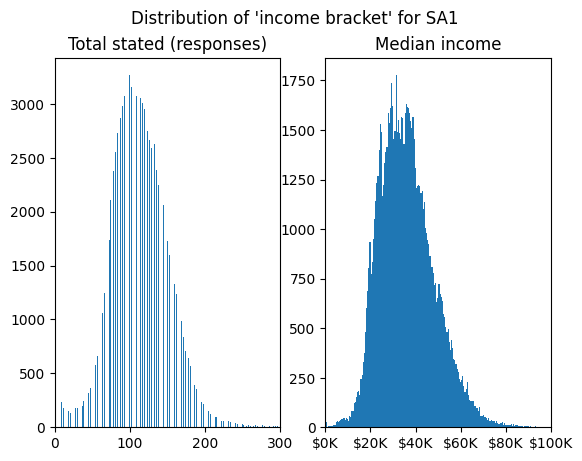

In [135]:
# what is the range of ibTS
ibTS = full.loc[(full.iloc[:, 1].str.startswith("ibTS")) & (full.loc[:, "OBS_VALUE"].astype(float) <= 10000), "OBS_VALUE"]
ibmed = full.loc[full.iloc[:, 1].str.startswith("ibmed"), "OBS_VALUE"]

# plot the distribution of income bracket
fig, axs = plt.subplots(1, 2)
axs[0].hist(ibTS, bins = 1000)
axs[1].hist(ibmed, bins = 250)
axs[0].set(xlim = (0, 300))
axs[1].set(xlim = (0, 100000))
xlabels = ['$'+'{:,.0f}'.format(x) + 'K' for x in axs[1].get_xticks()/1000]
axs[1].set_xticklabels(xlabels)
axs[0].set_title("Total stated (responses)")
axs[1].set_title("Median income")
fig.suptitle("Distribution of 'income bracket' for SA1")
plt.show()

### Distribution of income bracket  

Summary statistics for income bracket by Statistical Area 1 areas shows that most Statistical areas have a around 100 respondents.  Most areas have median income between $20,000 and $50,000.

In [153]:
# find values with income
inc = full.loc[(full.iloc[:, 1].str.contains("income")) & (full.iloc[:, 1].str.contains("edian")), ]
inc.iloc[:, 1].unique()

array(['ibmed: Median ($) - total personal income'], dtype=object)

There is only one variable that has a median for income:  "ibmed: Median ($) - total personal income".  How many variables also have medians?

In [155]:
meds = full.loc[full.iloc[:, 1].str.contains("edian"), ]
meds.iloc[:, 1].unique()

array(['asMed: Median - age', 'ibmed: Median ($) - total personal income'],
      dtype=object)

There are two variables that have median values:  "asMed: Median - age", and "ibmed: Median ($) - total personal income".

How about variables with the word "car"?

In [157]:
veh = full.loc[full.iloc[:, 1].str.contains("car"), ]
veh.iloc[:, 1].unique()

array(['tee002: Drive a car, truck or van',
       'tee003: Passenger in a car, truck or van',
       'teu002: Drive a car, truck or van',
       'teu003: Passenger in a car, truck or van',
       'twu003: Drive a private car, truck or van',
       'twu004: Drive a company car, truck or van',
       'twu005: Passenger in a car, truck, van or company bus',
       'tww003: Drive a private car, truck or van',
       'tww004: Drive a company car, truck or van',
       'tww005: Passenger in a car, truck, van or company bus'],
      dtype=object)

There are four categories that contain "car":  "tee02: Drive a car, truck or van", "tee003:  Passenger in a car, truck or van"...  The larger categories are split between "travel to education" (te) and "travel to work" (tw) and classification based on respondents home location or the location of the educational institution or place of work.  

How many variables reference children?

In [224]:
chld = full.loc[full.iloc[:, 1].str.contains("ild"), ]
chld.iloc[:, 1].unique()

array(['cb00: No children', 'cb01: One child', 'cb02: Two children',
       'cb03: Three children', 'cb04: Four children',
       'cb05: Five children', 'cb06: Six or more children',
       'cbmea: Average - number of children born',
       'cbTotal: Number of children born - total sex at birth female census usually resident population count aged 15 years and over',
       'cbTS: Total stated - number of children born',
       'up2: Looking after a child who is a member of own household',
       'up4: Looking after a child who does not live in own household'],
      dtype=object)

There are 12 categories that reference children

In [223]:
up = full.loc[full.iloc[:, 1].str.startswith("up"), ]
up.iloc[:, 1].unique()

array(['up0: No activities',
       'up1: Household work, cooking, repairs, gardening, etc, for own household',
       'up2: Looking after a child who is a member of own household',
       'up3: Looking after a member of own household who is ill or has a disability',
       'up4: Looking after a child who does not live in own household',
       'up5: Helping someone who is ill or has a disability who does not live in own household',
       'up6: Other helping or voluntary work for or through any organisation, group or marae',
       'up9: Not elsewhere included',
       'upTotal: Unpaid activities (total responses) - total census usually resident population count aged 15 years and over',
       'upTS: Total stated - unpaid activities'], dtype=object)

There are ten categories for unpaid activities, ranging from housework in own home, looking after a child of own household, looking after person with disability...

How many variables are there in total, including each category and response

In [231]:
# allVars = full.iloc[:, 1].unique()
len(allVars)
allVars



array(['1y01: Same as usual residence', '1y02: Elsewhere in New Zealand',
       '1y03: Not born one year ago', '1y04: Overseas',
       '1y05: No fixed abode one year ago',
       '1y77: Response unidentifiable',
       '1y98: New Zealand not further defined', '1y99: Not stated',
       '1yTotal: Usual residence 1 year ago indicator - total census usually resident population count',
       '1yTS: Total stated - usual residence 1 year ago indicator',
       '5y01: Same as usual residence', '5y02: Elsewhere in New Zealand',
       '5y03: Not born five years ago', '5y04: Overseas',
       '5y05: No fixed abode five years ago',
       '5y77: Response unidentifiable',
       '5y94: Unable to match to admin data',
       '5y98: New Zealand not further defined', '5y99: Not stated',
       '5yTotal: Usual residence 5 years ago indicator - total census usually resident population count',
       '5yTS: Total stated - usual residence 5 years ago indicator',
       'as01: 0-4 years', 'as02: 5-9 y

There are 499 unique Variables (categories, responses, and aggregations). What is that "yumea"

In [234]:
mea = full.loc[full.iloc[:, 1].str.contains("mea"), ]
mea.iloc[:, 1].unique()

array(['cbmea: Average - number of children born',
       'hwmea: Average - hours worked in employment per week',
       'teeTotal: Main means of travel to education, by education address - total census usually resident population who are studying',
       'teeTS: Total stated - main means of travel to education, by education address',
       'teuTotal: Main means of travel to education, by usual residence address - total census usually resident population who are studying',
       'teuTS: Total stated - main means of travel to education, by usual residence address',
       'twuTotal: Main means of travel to work, by usual residence address - total employed census usually resident population count aged 15 years and over',
       'twuTS: Total stated - main means of travel to work, by usual residence address',
       'twwTotal: Main means of travel to work, by workplace address - total employed census usually resident population count aged 15 years and over',
       'twwTS: Total stated

There are 12 categories that include the term "mea", but only four that include the term as part of the variable code:  "cbmea: Average - number of children born", "hwmea: Average - hours worked in employment per week", "yamea: Average - years since arrival in New Zealand", and "yumea: Average - years at usual residence".